# EXPLORATORY DATA ANALYSIS

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

setelah kami periksa , ternyata ada beberapa simbol latin yang tidak terbaca, 
oleh karena itu kami memakai encoding windows-1252.
lalu ternyata data pada kolom Order date dan Ship date tidak semuanya memiliki format tanggal yang sama,
kami memilih menguraikan tanggal dengan parse_dates

In [34]:
dataset = pd.read_csv('Sample - Superstore.csv' ,parse_dates=['Order Date','Ship Date'] ,encoding='windows-1252')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [24]:
dataset['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

kedepan nya kita tidak akan menggunakan kolom Postal Code dan Country , oleh karena itu kami akan drop kolom-kolom tersebut.
Lalu kami juga menambahkan kolom baru yaitu order dan ship berdasarkan tahun dan bulan. agar kedepan nya lebih mudah dalam menganalisa dataset

In [36]:
dataset.drop('Postal Code' , axis=1 , inplace=True)
dataset.drop('Country' , axis=1 , inplace=True)
dataset['order_year'] = dataset['Order Date'].dt.year
dataset['ship_year'] = dataset['Ship Date'].dt.year
dataset['order_month'] = dataset['Order Date'].dt.month 
dataset['ship_month'] = dataset['Ship Date'].dt.month

KeyError: "['Postal Code'] not found in axis"

In [37]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,ship_year,order_month,ship_month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016,11,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016,11,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015,10,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015,10,10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

dari 9994 baris di dataset kami , tidak ada satupun yang bernilai null , very nice!! 

Berikut adalah bagaimana bentuk statistik deskriptif dari dataset kami

In [5]:
dataset.describe()

,Row ID,Sales,Quantity,Discount,Profit,order_year,ship_year,order_month,ship_month
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896,2015.722233,2015.737442,7.809686,7.743146
std,2885.163629,623.245101,2.225110,0.206452,234.260108,1.123555,1.126141,3.284654,3.340476
min,1.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,2014.000000,1.000000,1.000000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750,2015.000000,2015.000000,5.000000,5.000000
50%,4997.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,2016.000000,9.000000,9.000000
75%,7495.750000,209.940000,5.000000,0.200000,29.364000,2017.000000,2017.000000,11.000000,11.000000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,2018.000000,12.000000,12.000000


Dapat kita lihat bahwa nilai minimum dari profit bernilai negatif , sekitar -6600 dan maksimum sekitar 8400 dengan standar deviasi 234 serta mean 28. menunjukkan kalau data kolom profit cukup bervariasi. menarik untuk kita cari bagaimana persebaran data-data tersebut.

## Analisis dan Visualisasi

Sekarang mari kita lihat tren pada dataset berdasarkan kategori , segmen , negara bagian (state) dan kota

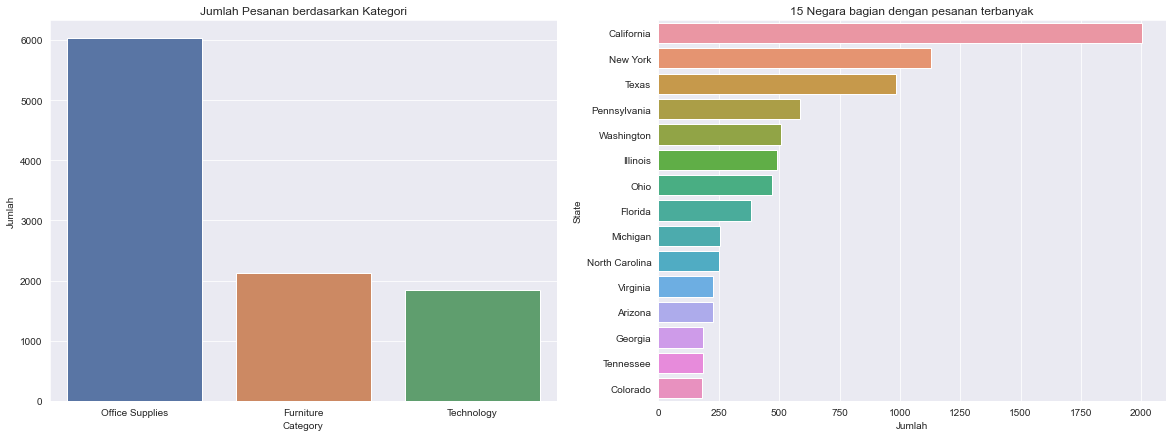

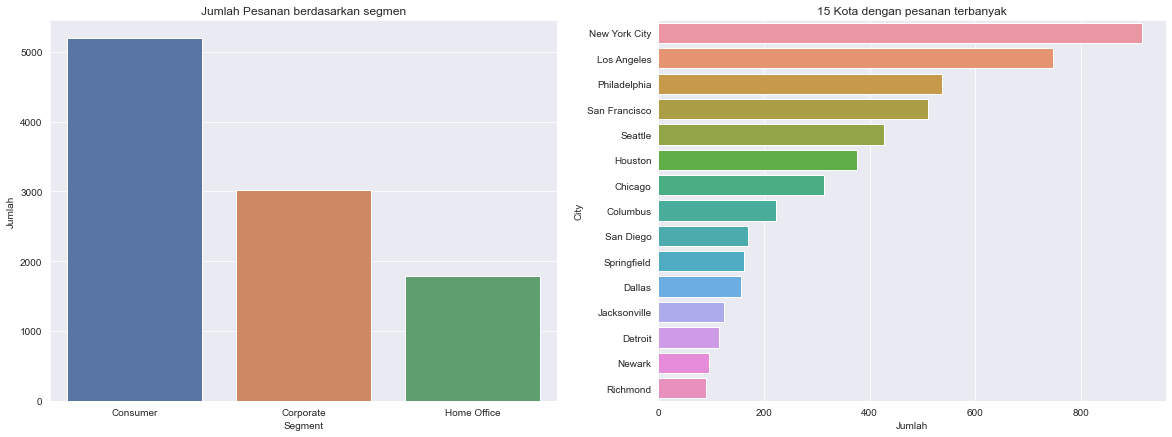

In [11]:
sns.set_style("darkgrid")
sns.set_palette("deep")

def counts_category(dataset,colname,title1,colname2,title2):

    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
    col_counts = dataset[[colname,'Order Date']].groupby(colname).count().sort_values('Order Date', ascending=False).head(15).reset_index(drop=False)
    col_counts.columns = [colname,'Jumlah']
    ax[0] = sns.barplot(data=col_counts, x=colname , y="Jumlah" ,ax=ax[0])
    ax[0].set_title(title1); ax[0].tick_params(labelrotation=0)

    col_counts2 = dataset[[colname2,'Order Date']].groupby(colname2).count().sort_values('Order Date', ascending=False).head(15).reset_index(drop=False)
    col_counts2.columns = [colname2,'Jumlah']
    ax[1] = sns.barplot(data=col_counts2, x='Jumlah' , y=colname2, ax=ax[1])
    ax[1].set_title(title2); ax[1].tick_params(labelrotation=0)
    return

counts_category(dataset,'Category','Jumlah Pesanan berdasarkan Kategori','State','15 Negara bagian dengan pesanan terbanyak')
counts_category(dataset,'Segment','Jumlah Pesanan berdasarkan segmen','City','15 Kota dengan pesanan terbanyak')

berdasarkan diagram tersebut dapat kita lihat pesanan terhadap kategori Office Supplies jauh lebih banyak di bandingkan kategori lain yaitu Furniture dan Technology. berarti apakah profit terbesar juga dari kategori Office Supplies? Sangat Menarik untuk kita lihat!

Consumer adalah segmen terbesar dalam jumlah pesanan , di ikuti oleh Corporate dan Home Office. kita akan simpan itu untuk nanti , siapa saja consumer yang paling menguntungkan?

California jauh melebihi negara bagian lain dari jumlah pesanan karena memiliki beberapa kota seperti Los Angeles , San Francisco , dan San diego. sedangkan Kota dengan jumlah pesanan terbesar di pegang oleh NYC. 

#### Sales and Profit berdasarkan Kategori

Sekarang kita akan melihat total penjualan dan juga total profit berdasarkan masing-masing kategori

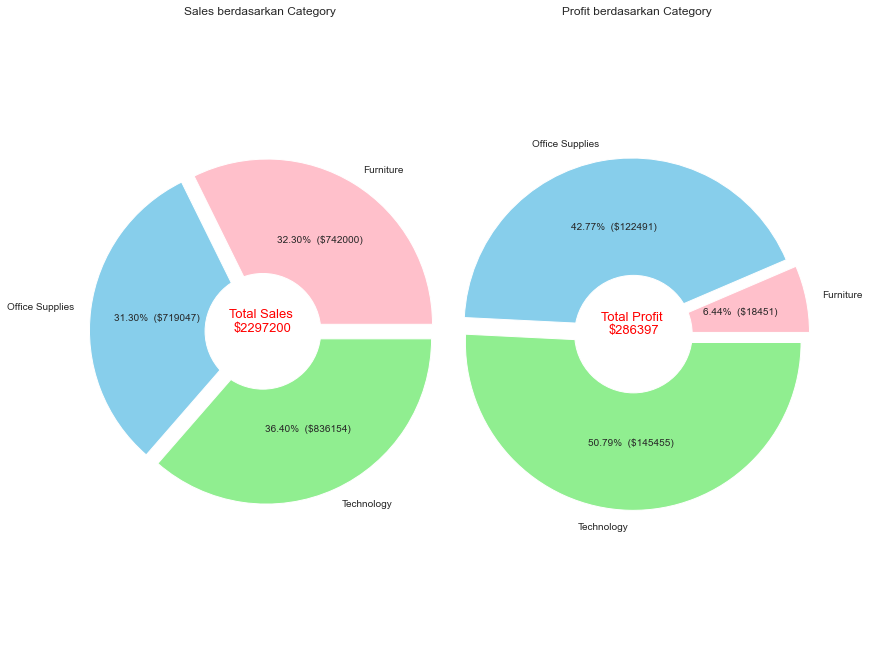

In [12]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  (${v:d})'.format(p=pct,v=val)
    return my_autopct

def money_pies(data,colname):
    money_list = ['Sales','Profit']
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
    fig.subplots_adjust(top=1)
    colors = ['pink','skyblue','lightgreen']
    c = 0
    for mt in money_list:
        ax[c].pie(data[mt], labels=data[colname],autopct=make_autopct(data[mt]),explode=[.05,.05,.05], colors=colors)
        white_circle = plt.Circle((0,0),0.35,fc='white')
        ax[c].add_artist(white_circle)
        label = ax[c].annotate('Total '+ mt + ' \n$'+str(data[mt].sum().astype(int)),color = 'red', xy=(0, 0), fontsize=13, ha="center")
        ax[c].set_title(str(mt) + " berdasarkan " + str(colname))
        ax[c].axis('equal') ; plt.tight_layout()
        fig.subplots_adjust(top=1.1)
        c=c+1
    return
category_profits_sales = (dataset[['Category','Sales','Profit']].groupby('Category').sum(['Sales','Profit']).reset_index(drop=False))
money_pies(category_profits_sales,'Category')

Seperti yang telah kita ketahui dari sebelumnya bahwa jumlah pesanan paling banyak berasal dari kategori Office supply , tetapi pada diagram lingkaran kali ini justru menunjukkan bahwa total penjualan berdasarkan kategori cukup merata , yaitu sekitar 30% untuk masing-masing kategori.

yang menarik justru dari total keuntungan , walaupun sangat kecil pada jumlah pemesanan namun kategori Technology memiliki total keuntungan terbesar dari yang lain pada angka 50,79%!!

#### Costumers pada segmen Consumer yang paling menguntungkan toko retail

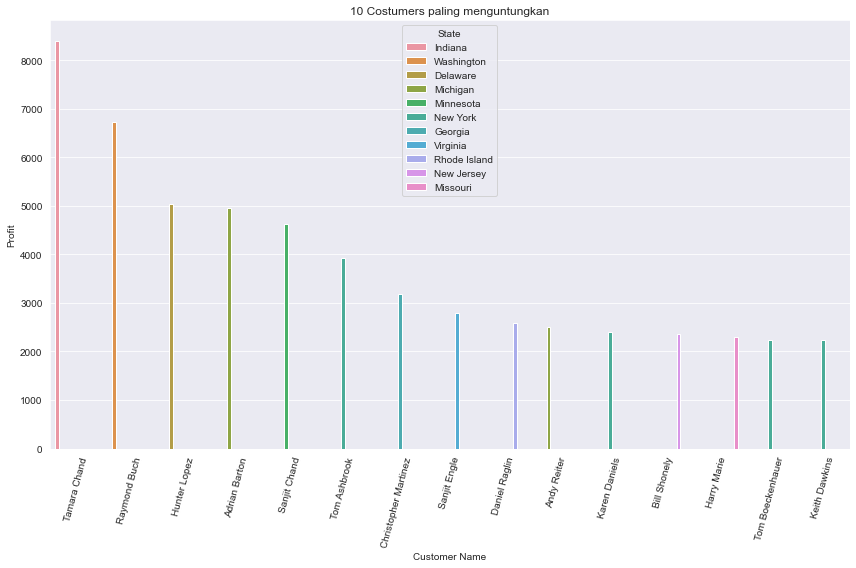

In [18]:
sortedTop15 = dataset.sort_values(['Profit'], ascending=False).head(15)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State', data=sortedTop15, ax=ax)
ax.set_title("10 Costumers paling menguntungkan")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

Persebaran customer yang memberi profit terbesar cukup merata pada tiap state. walaupun New York dan Michigan sedikit mendominasi

#### Analisa Region

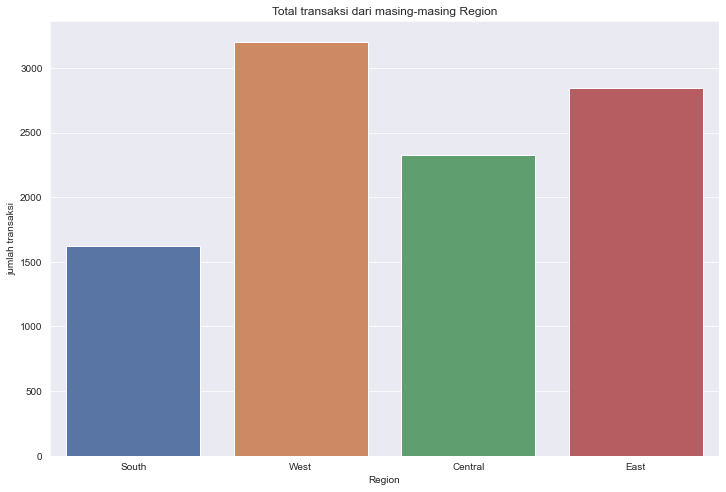

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x ='Region', data=dataset , palette= "deep")
plt.xlabel('Region')
plt.ylabel('jumlah transaksi')
plt.title('Total transaksi dari masing-masing Region')
plt.show()

Region West dan East merupakan 2 area dengan jumlah transaksi terbanyak , akan tetapi berdasarkan yang telah kita ketahui bahwa region East sangat di dominasi oleh kota New York sedangkan Region west cukup merata persebarannya . sehingga analisa yang lebih lanjut lebih baik di lakukan terhadap Region west

#### Analisa sub kategori

Mari kita lihat total penjualan dan profit dari seluruh sub kategori

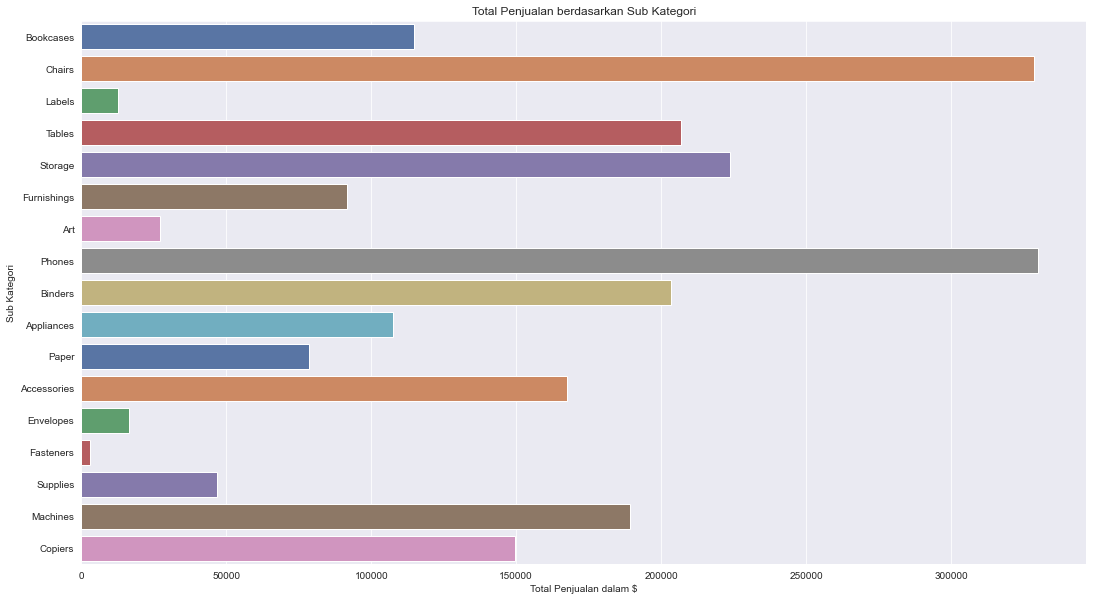

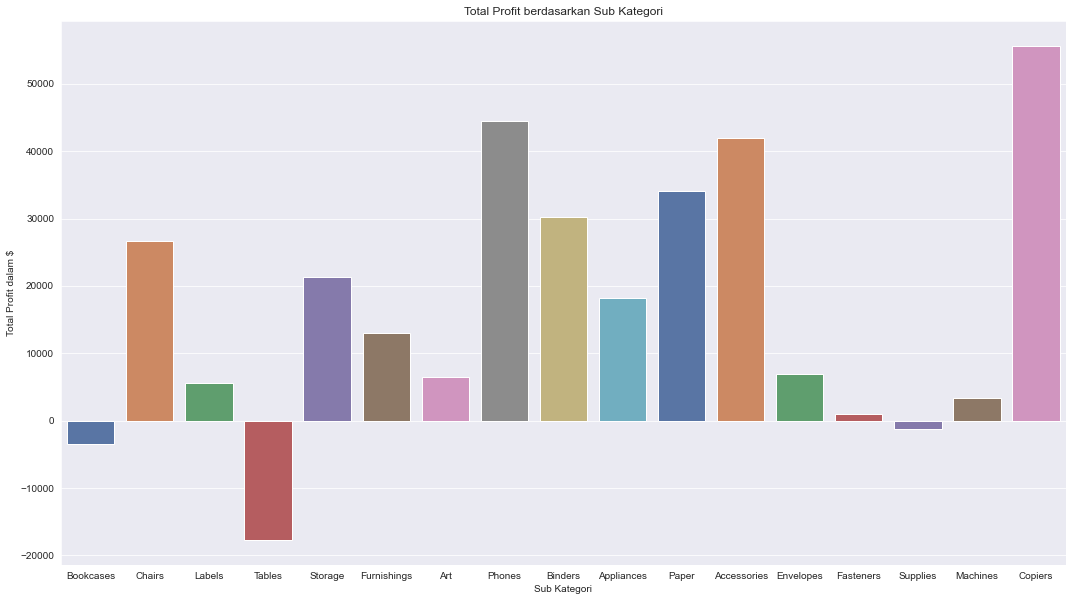

In [19]:
plt.figure(figsize=(18,10))
sns.barplot(x ='Sales', y ='Sub-Category', data=dataset , palette= "deep" , estimator=sum , ci=None)
plt.xlabel('Total Penjualan dalam $')
plt.ylabel('Sub Kategori')
plt.title('Total Penjualan berdasarkan Sub Kategori')

plt.figure(figsize=(18,10))
sns.barplot(x ='Sub-Category', y ='Profit', data=dataset , palette= "deep" , estimator=sum , ci=None)
plt.xlabel('Sub Kategori')
plt.ylabel('Total Profit dalam $')
plt.title('Total Profit berdasarkan Sub Kategori')
plt.show()

Total penjualan di dominasi oleh Chairs dan Phones , akan tetapi profit terbesar justru didapatkan dari Copiers , terlihat bahwa barang eletronik (kategori Technology) memang unggul dalam profit. Disini juga terlihat mengapa total penjualan kategori furnitur cukup tinggi akan tetapi profit nya sangat kecil , yaitu di karenakan profit yang bernilai negatif cukup besar pada tables. Menurunkan diskon yang terlalu besar bisa menjadi opsi untuk meningkatkan profit di kategori furniture

#### Analisis produk terbaik

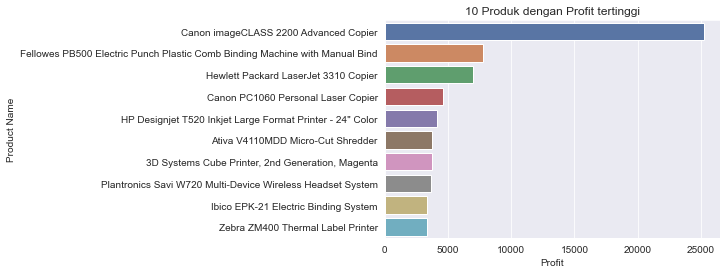

In [15]:
product_rank_by_profit = dataset.groupby('Product Name')['Profit'].sum().sort_values(ascending = False)
top_10_product = product_rank_by_profit.head(10)
sns.barplot(x = top_10_product , y = top_10_product.index)
plt.title('10 Produk dengan Profit tertinggi')
plt.show()

Canon imageCLASS 2200 Advanced Copier menghasilkan profit paling banyak. kita jadikan ini acuan untuk ditetapkan sebagai produk utama di masa depan.

#### Analisis penjualan dan profit tahunan

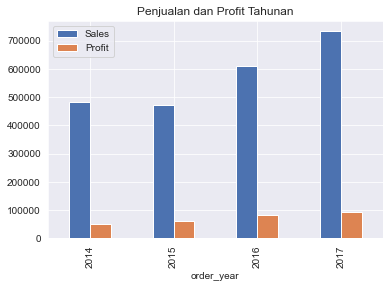

In [38]:
data_tahunan = dataset.groupby('order_year')[['Sales','Profit']].sum().reset_index()
data_tahunan.set_index('order_year').plot.bar(title = "Penjualan dan Profit Tahunan")
plt.show()

terlihat bahwa tren penjualan dan profit menaik , analisis time series akan di bahas lebih lanjut pada bagian selanjutnya